In [4]:
# matplotlib v3.7.1
import matplotlib.pyplot as plt
import matplotlib as mpl

# pandas v1.5.3
import pandas as pd

# numpy v1.24.3
import numpy as np

# seaborn v0.12.2
import seaborn as sns

import scipy.stats as st

raw_products = pd.read_csv("fr.openfoodfacts.org.products.csv", delimiter="\t")

/var/folders/ht/r34_b3vj4p7c88ck54235g_40000gn/T/ipykernel_19511/3543019911.py:16: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_products = pd.read_csv("fr.openfoodfacts.org.products.csv", delimiter="\t")


# Data Exploration

In [5]:
general_information = [
    "code",
    "url",
    "creator",
    "created_t",
    "created_datetime",
    "last_modified_t",
    "last_modified_datetime",
    "product_name",
    "generic_name",
    "quantity",
]

tags = [
    "packaging",
    "packaging_tags",
    "brands",
    "brands_tags",
    "categories",
    "categories_tags",
    "categories_fr",
    "origins",
    "origins_tags",
    "manufacturing_places",
    "manufacturing_places_tags",
    "labels",
    "labels_tags",
    "labels_fr",
    "emb_codes",
    "emb_codes_tags",
    "first_packaging_code_geo",
    "cities",
    "cities_tags",
    "purchase_places",
    "stores",
    "countries",
    "countries_tags",
    "countries_fr",
]

ingredients = [
    "ingredients_text",
    "traces",
    "traces_tags",
]

misc_data = [
    "serving_size",
    "no_nutriments",
    "additives_n",
    "additives",
    "additives_tags",
    "ingredients_from_palm_oil_n",
    "ingredients_from_palm_oil",
    "ingredients_from_palm_oil_tags",
    "ingredients_that_may_be_from_palm_oil_n",
    "ingredients_that_may_be_from_palm_oil",
    "ingredients_that_may_be_from_palm_oil_tags",
    "nutrition_grade_fr",
    "main_category",
    "main_category_fr",
    "image_url",
    "image_small_url",
]

nutrition_facts = [
    "energy_100g",
    "energy-from-fat_100g",
    "fat_100g",
    "saturated-fat_100g",
    "butyric-acid_100g",
    "caproic-acid_100g",
    "caprylic-acid_100g",
    "capric-acid_100g",
    "lauric-acid_100g",
    "myristic-acid_100g",
    "palmitic-acid_100g",
    "stearic-acid_100g",
    "arachidic-acid_100g",
    "behenic-acid_100g",
    "lignoceric-acid_100g",
    "cerotic-acid_100g",
    "montanic-acid_100g",
    "melissic-acid_100g",
    "monounsaturated-fat_100g",
    "polyunsaturated-fat_100g",
    "omega-3-fat_100g",
    "alpha-linolenic-acid_100g",
    "eicosapentaenoic-acid_100g",
    "docosahexaenoic-acid_100g",
    "omega-6-fat_100g",
    "linoleic-acid_100g",
    "arachidonic-acid_100g",
    "gamma-linolenic-acid_100g",
    "dihomo-gamma-linolenic-acid_100g",
    "omega-9-fat_100g",
    "oleic-acid_100g",
    "elaidic-acid_100g",
    "gondoic-acid_100g",
    "mead-acid_100g",
    "erucic-acid_100g",
    "nervonic-acid_100g",
    "trans-fat_100g",
    "cholesterol_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "sucrose_100g",
    "glucose_100g",
    "fructose_100g",
    "lactose_100g",
    "maltose_100g",
    "maltodextrins_100g",
    "starch_100g",
    "polyols_100g",
    "fiber_100g",
    "proteins_100g",
    "casein_100g",
    "serum-proteins_100g",
    "nucleotides_100g",
    "salt_100g",
    "sodium_100g",
    "alcohol_100g",
    "vitamin-a_100g",
    "beta-carotene_100g",
    "vitamin-d_100g",
    "vitamin-e_100g",
    "vitamin-k_100g",
    "vitamin-c_100g",
    "vitamin-b1_100g",
    "vitamin-b2_100g",
    "vitamin-pp_100g",
    "vitamin-b6_100g",
    "vitamin-b9_100g",
    "folates_100g",
    "vitamin-b12_100g",
    "biotin_100g",
    "pantothenic-acid_100g",
    "silica_100g",
    "bicarbonate_100g",
    "potassium_100g",
    "chloride_100g",
    "calcium_100g",
    "phosphorus_100g",
    "iron_100g",
    "magnesium_100g",
    "zinc_100g",
    "copper_100g",
    "manganese_100g",
    "fluoride_100g",
    "selenium_100g",
    "chromium_100g",
    "molybdenum_100g",
    "iodine_100g",
    "caffeine_100g",
    "taurine_100g",
    "ph_100g",
    "fruits-vegetables-nuts_100g",
    "collagen-meat-protein-ratio_100g",
    "cocoa_100g",
    "chlorophyl_100g",
    "carbon-footprint_100g",
    "nutrition-score-fr_100g",
    "nutrition-score-uk_100g",
    "glycemic-index_100g",
    "water-hardness_100g",
]

data_sections = {
    "General Information": general_information,
    "Tags": tags,
    "Ingredients": ingredients,
    "Miscellaneous Data": misc_data,
    "Nutrition Facts": nutrition_facts,
}

In [6]:
display(raw_products.shape)
raw_products.head()

(320772, 162)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mapping the null values by section to identify which variables are worth keeping 

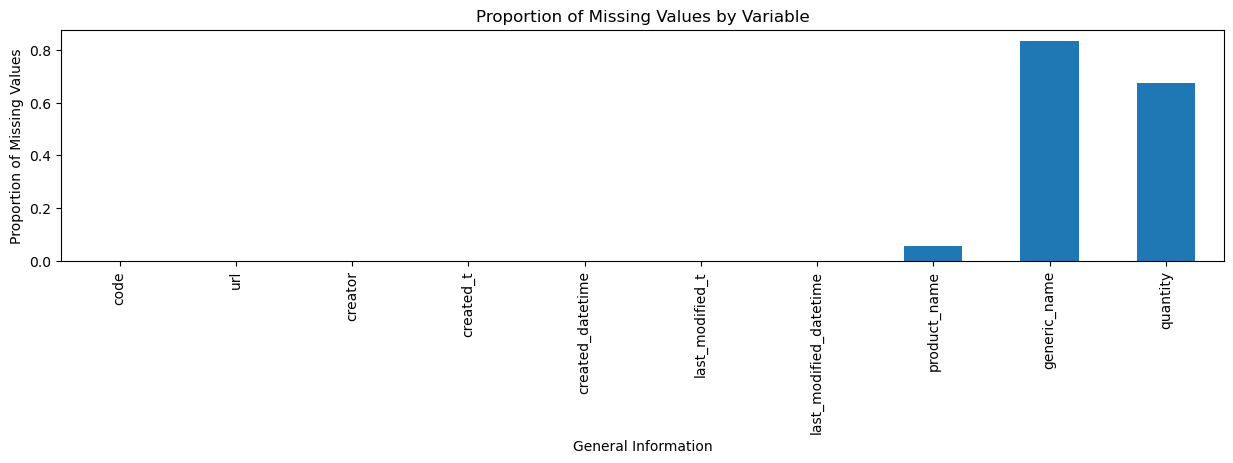

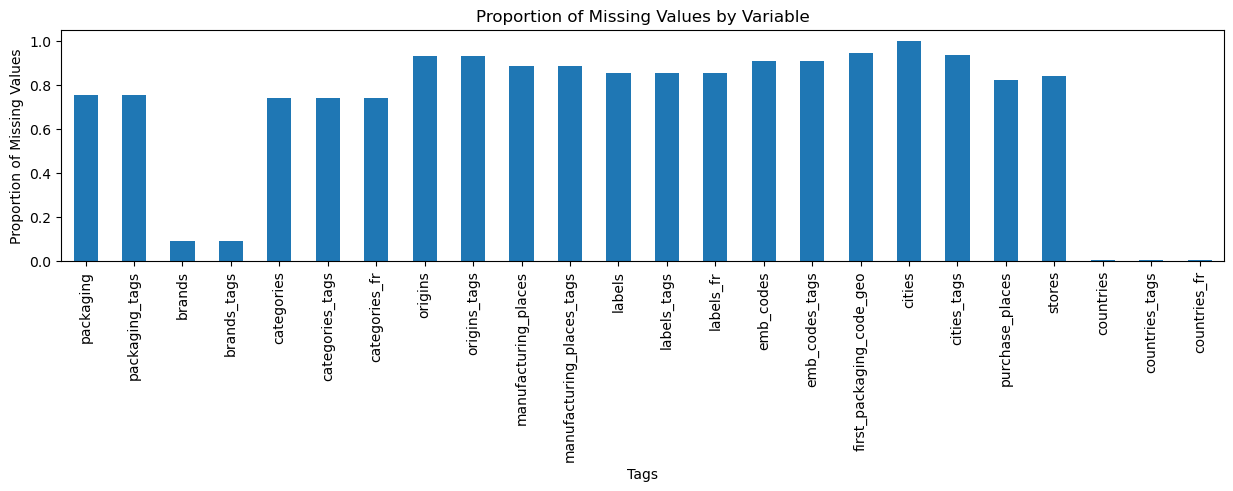

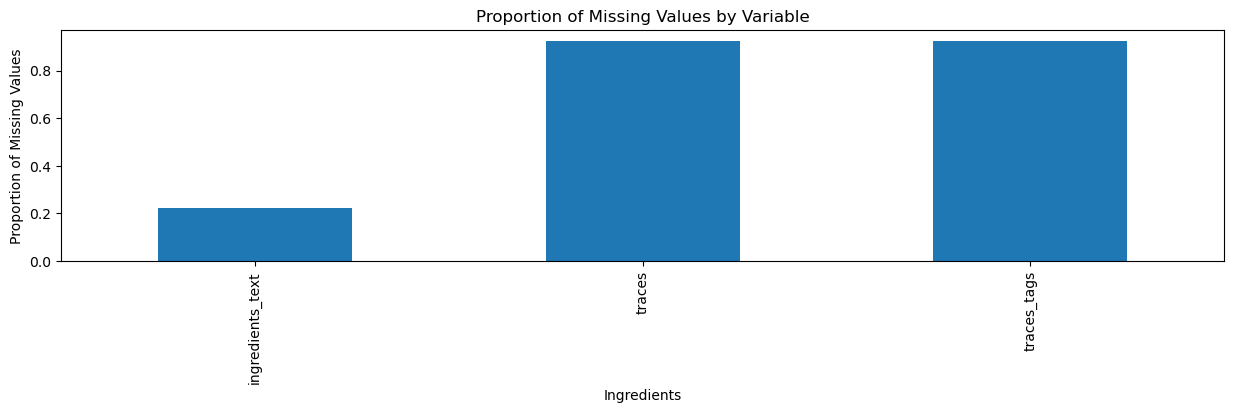

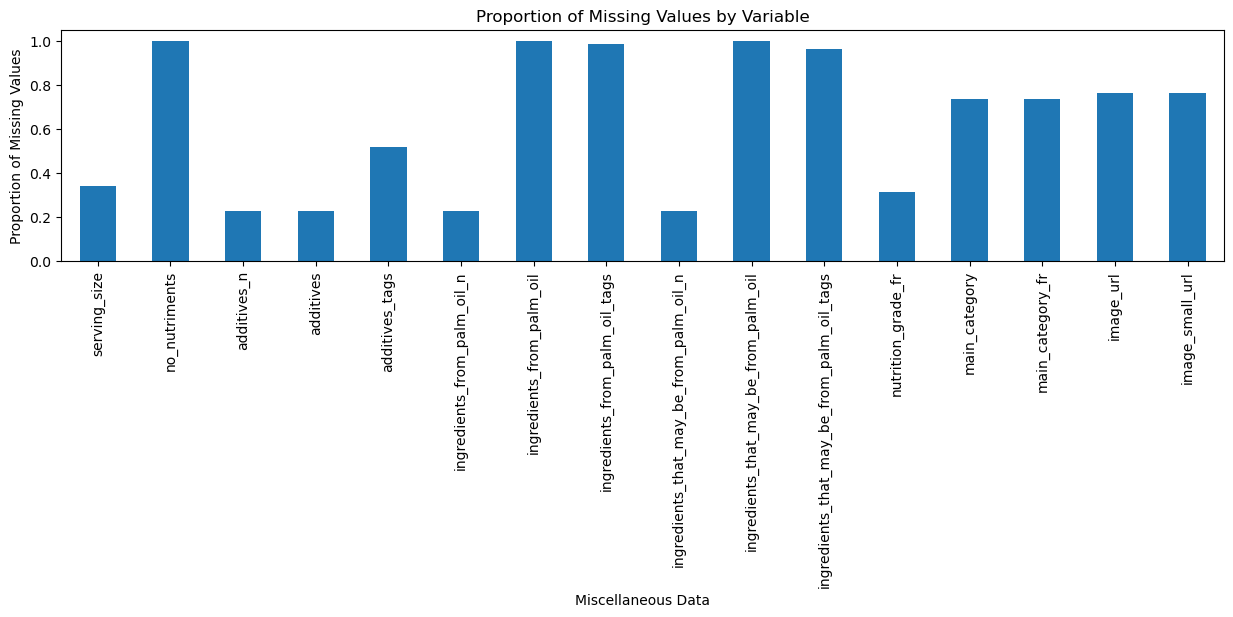

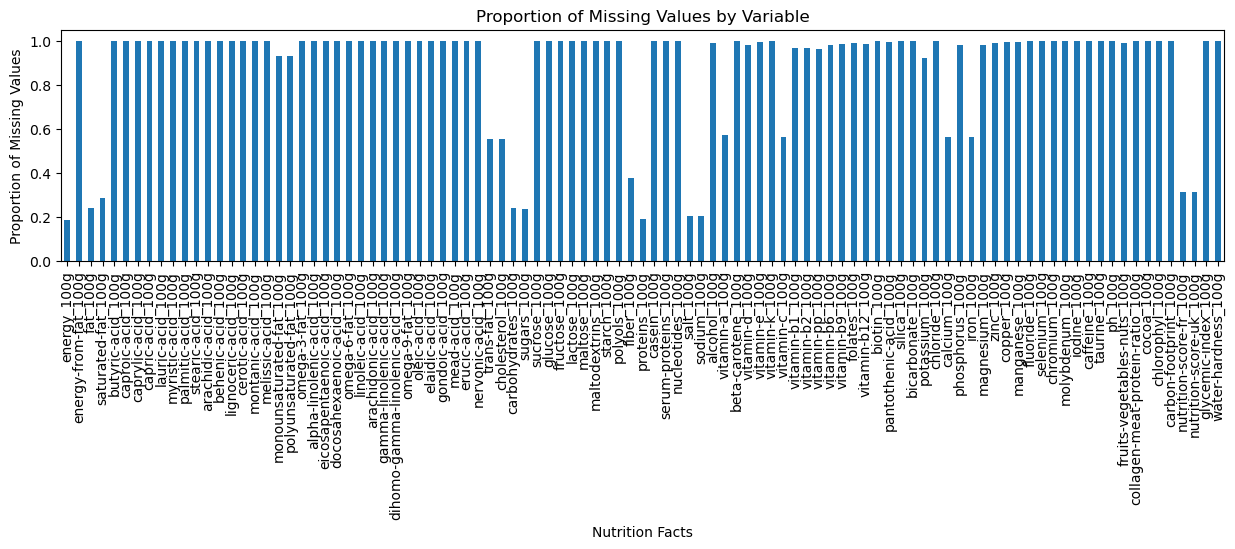

In [7]:
def plot_missing_data(df, section_name):
    plt.figure(figsize=[15, 3])
    df.isna().mean().plot(kind="bar")
    plt.title("Proportion of Missing Values by Variable")
    plt.xlabel(section_name)
    plt.ylabel("Proportion of Missing Values")
    plt.show()


for section_name, section in data_sections.items():
    plot_missing_data(raw_products[section], section_name)

There is a lot of missing data, with many variables containing more than 50% of null values. 

To start the cleaning process, we will set the cutoff at 50% to have a smaller data set. 

---

In [35]:
products = raw_products.loc[:, raw_products.isna().mean() < 0.5]

We can also remove the variables with duplicated information along with those that don't carry useful information:

In [219]:
products.columns

Index(['code', 'product_name', 'ingredients_text', 'additives_n',
       'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [36]:
products = products.drop(
    columns=[
        "creator",
        "created_t",
        "url",
        "last_modified_datetime",
        "created_datetime",
        "brands",
        "ingredients_that_may_be_from_palm_oil_n",
        "last_modified_t",
        "brands_tags",
        "countries_tags",
        "countries",
        "countries_fr",
        "states_tags",
        "additives",
        "states",
        "states_fr",
        "nutrition-score-uk_100g",
        "serving_size",
        "ingredients_text",
    ]
)

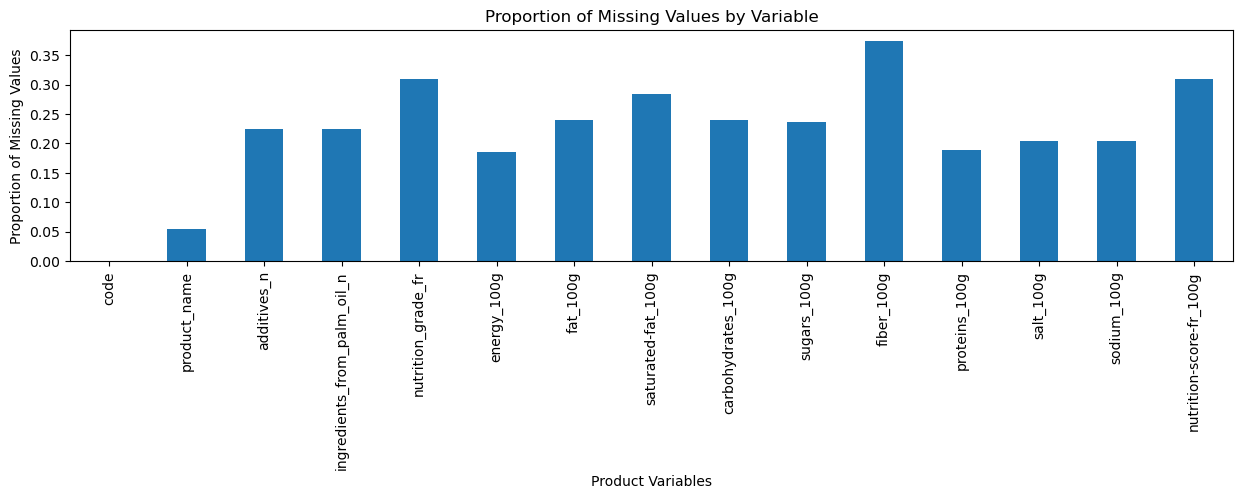

In [10]:
plot_missing_data(products, "Product Variables")

Check for duplicated entries: 

In [37]:
products.loc[products.duplicated(subset="code")]

,code,product_name,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
481,16117,Colossal Olives With Jalapeno Peppers,1.0,0.0,NaN,347.0,8.33,NaN,0.00,NaN,NaN,0.00,3.38582,1.333000,NaN
519,24600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,31233,Super chicken spinach & quinoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,58001,Bramley Apple Crumble,NaN,NaN,d,1192.0,NaN,7.40,NaN,21.60,2.2,3.20,0.23000,0.090551,12.0
1337,9800800056,Hazelnut Spread + Breadsticks,0.0,0.0,e,2171.0,26.92,9.62,65.38,44.23,3.8,7.69,0.63500,0.250000,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280571,54491472,Coca-Cola,2.0,0.0,e,180.0,0.00,0.00,10.60,10.60,0.0,0.00,0.00000,0.000000,14.0
280572,54491496,Diet coke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281938,58449410003,Natures Path organic frosted berry toaster pas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300376,78742087108,Juice Cocktail Blended With Another Juice From...,3.0,0.0,NaN,192.0,0.00,NaN,11.67,11.67,NaN,0.00,0.05334,0.021000,NaN


In [38]:
products = products.loc[~products.duplicated(subset="code")]

We can remove entries that contain less than 20% data aside from general information:

In [39]:
nutrition_info = products.iloc[:, 3:].columns

products_to_remove = products.loc[products[nutrition_info].isna().mean(axis=1) > 0.8]

len(products_to_remove) / len(products) * 100

18.39514220041854

In [40]:
products = products.drop(products_to_remove.index)

# Data Cleaning

Check the column types to see whether there is erroneous data:

In [15]:
products.dtypes

code                            object
product_name                    object
additives_n                    float64
ingredients_from_palm_oil_n    float64
nutrition_grade_fr              object
energy_100g                    float64
fat_100g                       float64
saturated-fat_100g             float64
carbohydrates_100g             float64
sugars_100g                    float64
fiber_100g                     float64
proteins_100g                  float64
salt_100g                      float64
sodium_100g                    float64
nutrition-score-fr_100g        float64
dtype: object

## Outliers

In [41]:
products.set_index("code", inplace=True)
products.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,234755.000000,234755.000000,2.606300e+05,243371.000000,229483.000000,243454.000000,244814.000000,200817.000000,259807.000000,255373.000000,255332.000000,221105.000000
mean,1.995676,0.019582,1.142130e+03,12.702016,5.129758,32.073220,15.992632,2.861833,7.076654,2.024228,0.797066,9.167106
std,2.516089,0.140271,6.453001e+03,17.560363,8.013425,29.732011,22.321035,12.869511,8.409511,128.290369,50.512072,9.056095
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,1.000000
50%,1.000000,0.000000,1.100000e+03,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,10.000000
75%,3.000000,0.000000,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,16.000000
max,31.000000,2.000000,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000


The min and max values of nutrition information variables suggest that there are some outliers. The rest of the variables however seem to have coherent data.

Both additives and ingredients_from_palm_oil have very little variation and might therefore not yield interesting restults, we will therefore drop them.

In [91]:
products = products.drop(
    columns=[
        "ingredients_from_palm_oil_n",
        "additives_n",
    ]
)

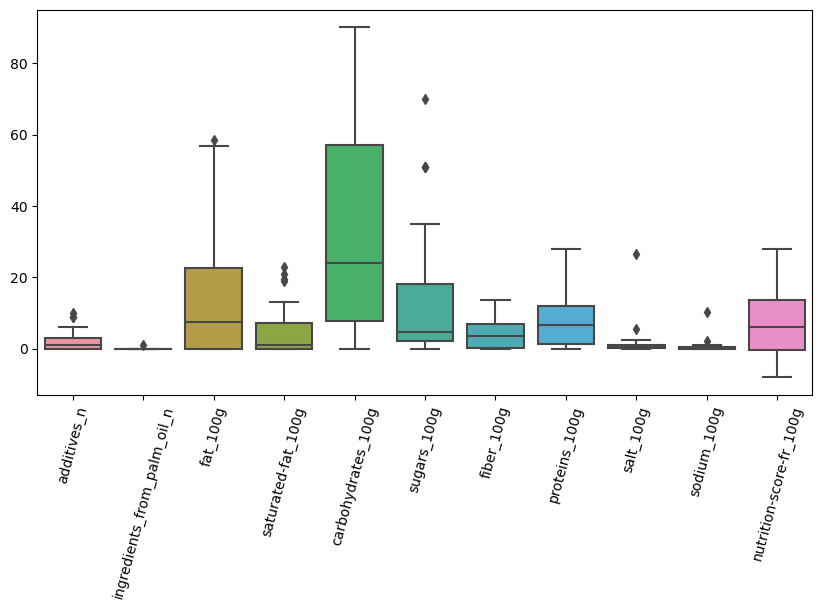

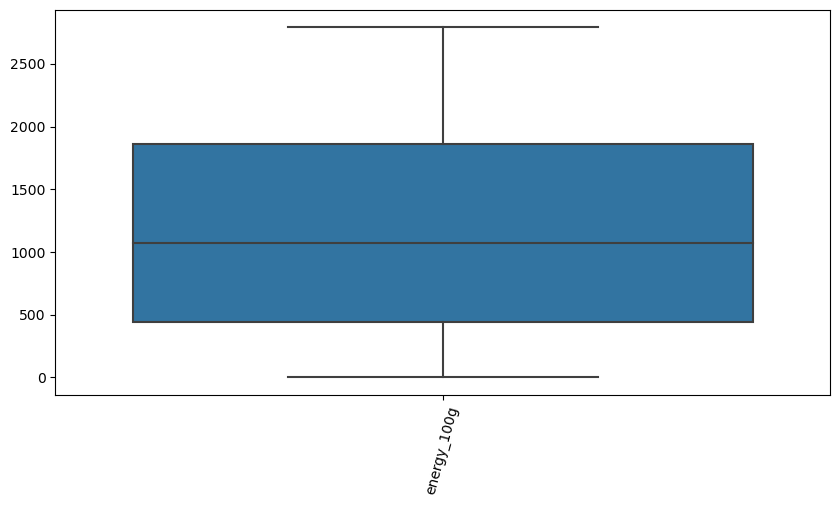

In [89]:
sample_outliers = products.sample(50).index

plt.figure(figsize=[10, 5])
sns.boxplot(products.loc[sample_outliers, products.columns != "energy_100g"])
plt.xticks(rotation=75)
plt.show()

plt.figure(figsize=[10, 5])
sns.boxplot(products.loc[sample_outliers, products.columns == "energy_100g"])
plt.xticks(rotation=75)
plt.show()

### Removing nutritional information outliers

Testing IQR method

In [18]:
products.isna().mean().mean()

0.08191967783341222

In [19]:
def remove_outliers(df):
    Q1 = np.nanpercentile(df, 25)
    Q3 = np.nanpercentile(df, 75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[(df < lower_bound) | (df > upper_bound)] = np.nan
    return df


df = products.loc[:, ~products.columns.isin(["product_name", "nutrition_grade_fr"])]
products_without_outliers = df.apply(remove_outliers, axis=0)
products_without_outliers.isna().mean().mean()

0.11841583956604763

The IQR method removes 10% of data, we will therefore identify outliers by the non null values outside of the 0-100 range for nutrition information:

In [34]:
products.loc[(products["fat_100g"] < 0 | products["fat_100g"] > 100), "fat_100g"]

Series([], Name: fat_100g, dtype: float64)

In [70]:
nutrition_facts = [
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
]

products[nutrition_facts] = np.where(
    ((products[nutrition_facts] < 0) | (products[nutrition_facts] > 100))
    & products[nutrition_facts].notna(),
    np.NAN,
    products[nutrition_facts],
)
products.isna().mean().mean()

0.08198628629956665

In [83]:
products_with_missing_data = products.loc[
    products[nutrition_facts].isna().mean(axis=1) > 0.6
]
products_with_missing_data

,product_name,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
code,,,,,,,,,,,,,,
16117,Organic Long Grain White Rice,0.0,0.0,NaN,1490.0,NaN,NaN,80.0,NaN,NaN,8.89,NaN,NaN,NaN
16513,Organic Sunflower Oil,0.0,0.0,NaN,3586.0,100.0,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18371,Real Salt Granular,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.15678,37.857,NaN
18562,"Sweeteners, Demerara Turbinado Sugar",0.0,0.0,NaN,1569.0,NaN,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN
33084,Fine Sea Salt,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.90582,39.333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9501100460042,Candia GrandLait,0.0,0.0,NaN,259.0,3.5,NaN,4.6,NaN,NaN,3.00,NaN,NaN,NaN
9504000004040,Nectar de Mangue,2.0,0.0,NaN,246.0,1.0,NaN,14.0,NaN,NaN,0.10,NaN,NaN,NaN
9504000004057,DAFANI Cocktail Mangue Orange,2.0,0.0,NaN,246.0,0.1,NaN,14.0,NaN,NaN,0.10,NaN,NaN,NaN


In [82]:
products_with_missing_data.shape[0] / (products.shape[0])

0.018130606098824033

We will drop all products with more than 60% of missing nutrition information:

In [86]:
products = products.drop(products_with_missing_data.index)

In [87]:
products.isna().mean().mean()

0.07325909660357509

## Missing Data

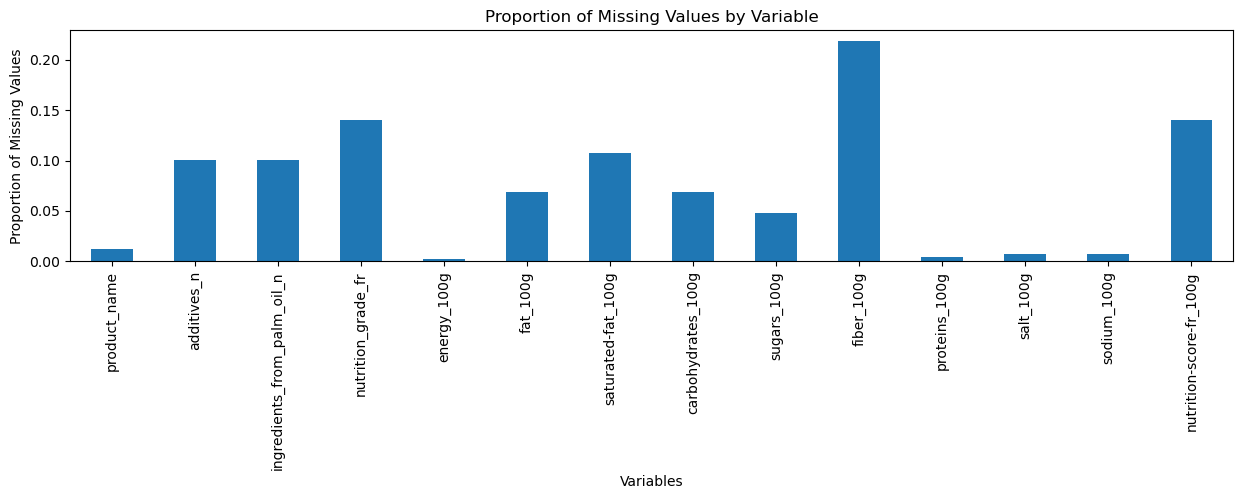

In [90]:
plot_missing_data(products, "Variables")